In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

from scipy.stats import randint

In [2]:
telco = pd.read_csv('telco.csv')
telco

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,...,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,no,no,no,...,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,no,no,no,...,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,...,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


In [3]:
# telco['Churn_num'] = telco['Churn'].apply(lambda x: 1 if x == 'yes' else 0)

In [4]:
telco.groupby(['Churn'])[['CustServ_Calls','Vmail_Message']].agg(['mean','std'])

# Churners make more customer service calls than non-churners.
# Churners leave fewer voice mail messages than non-churners.

CustServ_Calls           Vmail_Message           
                mean       std          mean        std
Churn                                                  
no          1.449825  1.163883      8.604561  13.913125
yes         2.229814  1.853275      5.115942  11.860138

Churn by State

When dealing with customer data, geographic regions may play an important part in determining whether a customer will cancel their service or not. You may have noticed that there is a 'State' column in the dataset. In this exercise, you'll group 'State' and 'Churn' to count the number of churners and non-churners by state.

In [5]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: count, Length: 102, dtype: int64


C:\Users\Alienware\AppData\Local\Temp\ipykernel_28152\2462608901.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


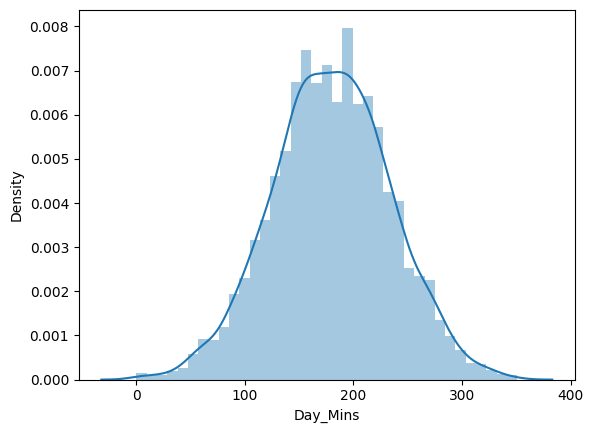

C:\Users\Alienware\AppData\Local\Temp\ipykernel_28152\2462608901.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


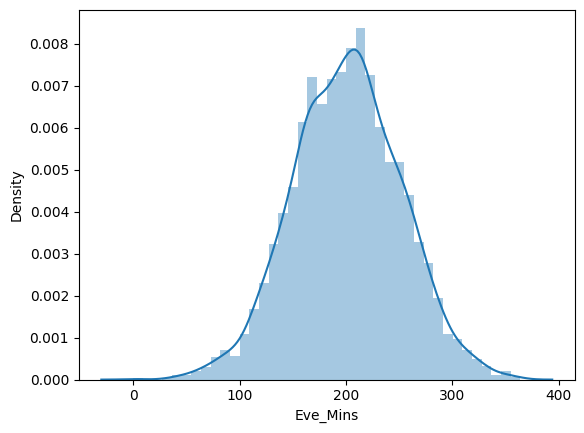

C:\Users\Alienware\AppData\Local\Temp\ipykernel_28152\2462608901.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


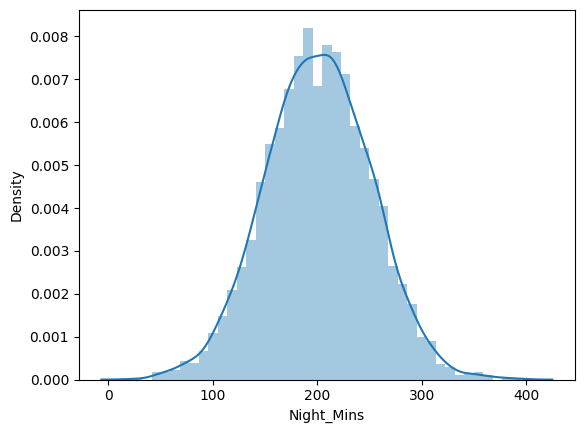

C:\Users\Alienware\AppData\Local\Temp\ipykernel_28152\2462608901.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


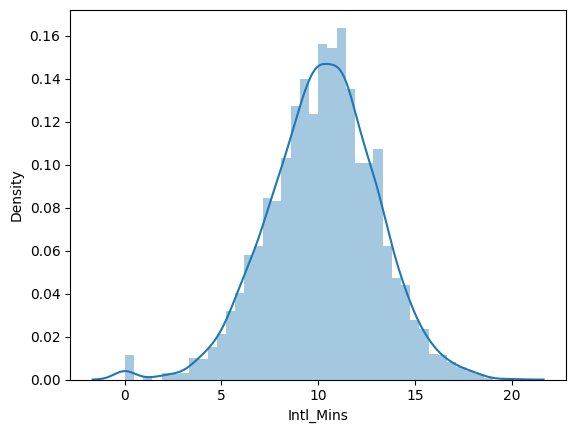

In [6]:
# Visualize the distribution of the following variables:

vars = ['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins']

for var in vars:
    sns.distplot(telco[var])

    # Display the plot
    plt.show()

Customer service calls and churn

You've already seen that there's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

Let's now visualize this difference using a box plot and incorporate other features of interest - do customers who have international plans make more customer service calls? Or do they tend to churn more? How about voicemail plans?

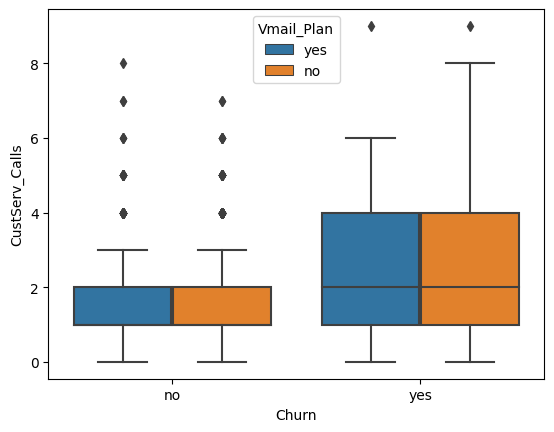

In [7]:
# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            # sym = "",
            hue = "Vmail_Plan")

# Display the plot
plt.show()

# It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls. 

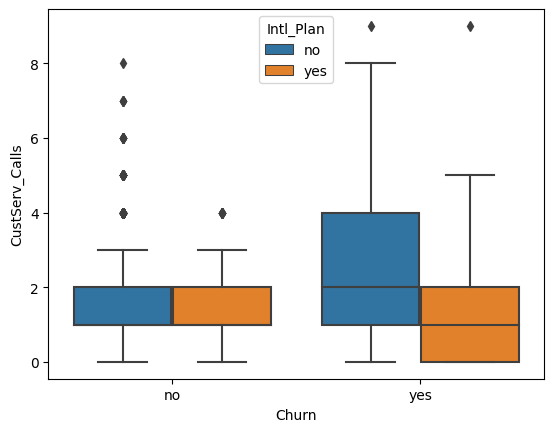

In [8]:
# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            # sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()

Encoding binary features

Recasting data types is an important part of data preprocessing. In this exercise you will assign the values 1 to 'yes' and 0 to 'no' to the 'Vmail_Plan' and 'Churn' features, respectively.

In [9]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0,'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Intl_Plan'
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0,'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0,'yes':1})

telco

C:\Users\Alienware\AppData\Local\Temp\ipykernel_28152\607490178.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0,'yes':1})
C:\Users\Alienware\AppData\Local\Temp\ipykernel_28152\607490178.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0,'yes':1})
C:\Users\Alienware\AppData\Local\Temp\ipykernel_28152\607490178.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versi

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,0,1,...,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,0,...,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,0,...,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,0,1,0,...,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


In [10]:
# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])

telco_state

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3329,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3331,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Scale telco using StandardScaler
telco_scaled = StandardScaler().fit_transform(telco[["Intl_Calls", "Night_Mins"]])

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

telco_scaled_df

,Intl_Calls,Night_Mins
0,-0.601195,0.866743
1,-0.601195,1.058571
2,0.211534,-0.756869
3,1.024263,-0.078551
4,-0.601195,-0.276311
...,...,...
3328,0.617898,1.547039
3329,-0.194831,-0.189297
3330,0.617898,-0.177431
3331,2.243356,-1.219628


In [12]:
# Print summary statistics
telco_scaled_df.describe()

,Intl_Calls,Night_Mins
count,3.333000e+03,3.333000e+03
mean,-8.527366e-18,7.887813e-17
std,1.000150e+00,1.000150e+00
min,-1.820289e+00,-3.513648e+00
25%,-6.011951e-01,-6.698545e-01
50%,-1.948306e-01,6.485803e-03
75%,6.178983e-01,6.808485e-01
max,6.307001e+00,3.839081e+00


In [13]:
# Drop the unnecessary features
telco = telco.drop(telco[['Area_Code','Phone']], axis=1)

telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']

# Verify dropped features
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State',
       'Avg_Night_Calls'],
      dtype='object')

In [14]:
# select useful features

features_and_target = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge','Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'Churn']

telco = telco[features_and_target]

telco

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,1,77,26.55,126,18.32,83,12.56,6,2.67,0
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,57,39.29,55,13.04,123,8.61,4,2.59,0
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,109,30.74,58,24.55,91,8.64,6,3.81,0
3331,184,0,213.8,159.6,139.2,5.0,2,1,0,105,36.35,84,13.57,137,6.26,10,1.35,0


In [15]:
# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 17), (1000, 17), (2333,), (1000,))

Computing accuracy

Having split your data into training and testing sets, you can now fit your model to the training data and then predict the labels of the test data.

In [16]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.962


In [17]:
y_pred = clf.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[859   6]
 [ 32 103]]


Varying training set size

The size of your training and testing sets influences model performance. Models learn better when they have more training data. However, there's a risk that they overfit to the training data and don't generalize well to new data, so in order to properly evaluate the model's ability to generalize, you need enough testing data. As a result, there is a important balance and trade-off involved between how much you use for training and how much you hold for testing.

So far, you've used 70% for training and 30% for testing. Let's now use 80% of the data for training and evaluate how that changes the model's performance.

In [18]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

[[558   4]
 [ 28  77]]


In [19]:
# Print the precision
print(precision_score(y_test, y_pred))

# Print the recall
print(recall_score(y_test, y_pred))

0.9506172839506173
0.7333333333333333


ROC curve

Let's now create an ROC curve for our random forest classifier. The first step is to calculate the predicted probabilities output by the classifier for each label using its .predict_proba() method. Then, you can use the roc_curve function from sklearn.metrics to compute the false positive rate and true positive rate, which you can then plot using matplotlib.

In [20]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

fpr.shape, tpr.shape, thresholds.shape

((71,), (71,), (71,))

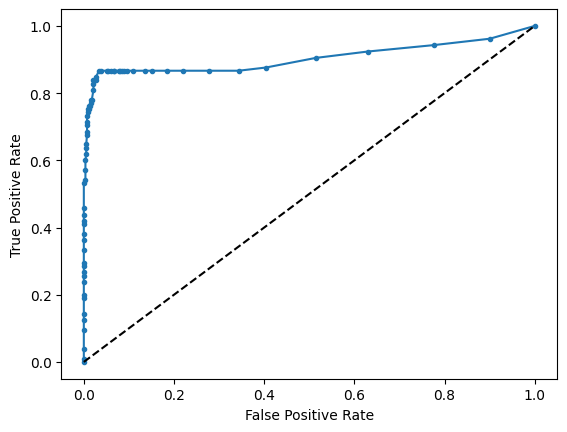

In [21]:
# Plot the ROC curve
plt.plot(fpr,tpr,marker='.')

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

Precision-recall curve

Another way to evaluate model performance is using a precision-recall curve, which shows the tradeoff between precision and recall for different thresholds.

Precision-recall curves tend to be more informative when you have imbalanced classes.

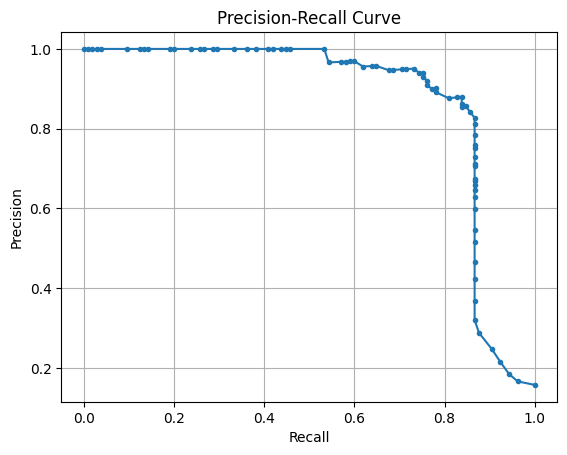

In [22]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

In [23]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9032706320962548


F1 score

As you've discovered, there's a tradeoff between precision and recall. Both are important metrics, and depending on how the business is trying to model churn, you may want to focus on optimizing one over the other. Often, stakeholders are interested in a single metric that can quantify model performance. The AUC is one metric you can use in these cases, and another is the F1 score, which is calculated as below:

2 * (precision * recall) / (precision + recall)
The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model, even in situations where you might have imbalanced classes. 

In [24]:
# Print the F1 score
print(f1_score(y_test, y_pred))

0.8279569892473119


Tuning the number of features

The default hyperparameters used by your models are not optimized for your data. The goal of grid search cross-validation is to identify those hyperparameters that lead to optimal model performance. In the video, you saw how the random forest's n_estimators hyperparameter was tuned. Here, you'll practice tuning the max_features hyperparameter. The cv hyperparameter is set to 3 so that the code executes quickly.

max_features --> Number of features for best split

A random forest is an ensemble of many decision trees. The n_estimators hyperparameter controls the number of trees to use in the forest, while the max_features hyperparameter controls the number features the random forest should consider when looking for the best split at decision tree.

In [25]:
clf

RandomForestClassifier()

In [26]:
# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

{'max_features': 'sqrt'}


Tuning other hyperparameters

The power of GridSearchCV really comes into play when you're tuning multiple hyperparameters, as then the algorithm tries out all possible combinations of hyperparameters to identify the best combination. Here, you'll tune the following random forest hyperparameters:

criterion --> Quality of Split

max_features --> Number of features for best split

max_depth --> Max depth of tree

bootstrap --> Whether Bootstrap samples are used

In [27]:
# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X,y)

# Print the best hyperparameters
print(grid_search.best_params_) 

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}


Randomized search

In the above chunk of code from the previous exercise, you may have noticed that the first line of code did not take much time to run, while the call to .fit() took several seconds to execute.

This is because .fit() is what actually performs the grid search, and in our case, it was grid with many different combinations. As the hyperparameter grid gets larger, grid search becomes slower. In order to solve this problem, instead of trying out every single combination of values, we could randomly jump around the grid and try different combinations. There's a small possibility we may miss the best combination, but we would save a lot of time, or be able to tune more hyperparameters in the same amount of time.

In scikit-learn, you can do this using RandomizedSearchCV. It has the same API as GridSearchCV, except that you need to specify a parameter distribution that it can sample from instead of specific hyperparameter value

By default, n_iter is set to 10 if not specified. Additionally, each parameter setting is evaluated using cross-validation (in this case, cv=3).

In [28]:
# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist, cv=3)

# Fit the model
random_search.fit(X,y)

# Print best parameters
print(random_search.best_params_) 

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9}


In [29]:
results = random_search.cv_results_
results

{'mean_fit_time': array([1.23635395, 0.71274074, 0.62419232, 1.34446001, 0.72918502,
        1.44616946, 0.75434518, 1.67933027, 1.69869947, 0.97900828]),
 'std_fit_time': array([0.10329689, 0.022036  , 0.04130528, 0.02693284, 0.02478092,
        0.05235952, 0.01170974, 0.04787402, 0.05053317, 0.02090699]),
 'mean_score_time': array([0.02571559, 0.02539118, 0.01807753, 0.02040966, 0.02590513,
        0.01449815, 0.02187379, 0.02209298, 0.02693319, 0.02730854]),
 'std_score_time': array([0.00518236, 0.00437553, 0.00301451, 0.0052213 , 0.00398287,
        0.00148642, 0.00497216, 0.00482943, 0.0040687 , 0.00287258]),
 'param_bootstrap': masked_array(data=[True, False, True, True, True, True, True, False,
                    False, True],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_criterion': masked_array(data=['gini', 'entropy', 'entropy', 'entropy', 'entropy',
 

In [30]:
# Convert the results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Select the columns of interest
columns_of_interest = ['mean_test_score', 'std_test_score', 'params']
results_df = results_df[columns_of_interest]

# Display the DataFrame
pd.set_option('display.max_colwidth', None)
results_df.sort_values('mean_test_score', ascending = False)

,mean_test_score,std_test_score,params
3,0.957096,0.006336,"{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9}"
6,0.957096,0.005516,"{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4}"
9,0.955596,0.005417,"{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6}"
5,0.954695,0.005214,"{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}"
1,0.953495,0.007398,"{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3}"
4,0.953195,0.006279,"{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4}"
7,0.951995,0.006421,"{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9}"
0,0.951395,0.006532,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 8}"
8,0.950495,0.007238,"{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9}"
2,0.944794,0.005986,"{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3}"


Visualizing feature importances

Your random forest classifier from earlier exercises has been fit to the telco data and is available to you as clf. Let's visualize the feature importances and get a sense for what the drivers of churn are, using matplotlib's barh to create a horizontal bar plot of feature importances.

In [31]:
# Calculate feature importances
importances = clf.feature_importances_

importances

array([0.0317961 , 0.03342606, 0.14391821, 0.07219352, 0.04050661,
       0.04441623, 0.11458243, 0.07126467, 0.02647862, 0.02977667,
       0.13700325, 0.02955011, 0.06510131, 0.03089961, 0.03678288,
       0.05328704, 0.03901667])

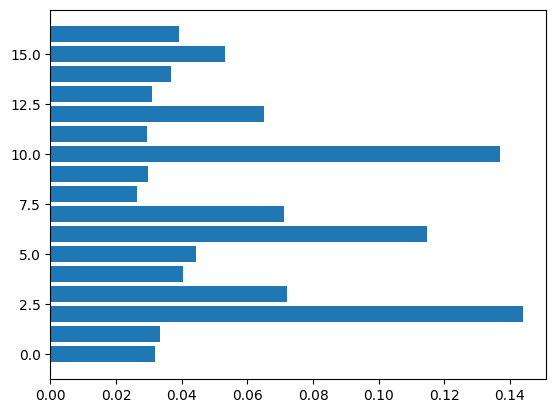

In [32]:
# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

Improving the plot

In order to make the plot more readable, we need to do achieve two goals:

Re-order the bars in ascending order.

Add labels to the plot that correspond to the feature names.

To do this, we'll take advantage of NumPy indexing. The .argsort() method sorts an array and returns the indices. We'll use these indices to achieve both goals.

In [33]:
# Sort importances
sorted_index = np.argsort(importances)
sorted_index

array([ 8, 11,  9, 13,  0,  1, 14, 16,  4,  5, 15, 12,  7,  3,  6, 10,  2],
      dtype=int64)

In [34]:
labels = X.columns[sorted_index]
labels

Index(['Vmail_Plan', 'Eve_Calls', 'Day_Calls', 'Night_Calls', 'Account_Length',
       'Vmail_Message', 'Night_Charge', 'Intl_Charge', 'Night_Mins',
       'Intl_Mins', 'Intl_Calls', 'Eve_Charge', 'Intl_Plan', 'Eve_Mins',
       'CustServ_Calls', 'Day_Charge', 'Day_Mins'],
      dtype='object')

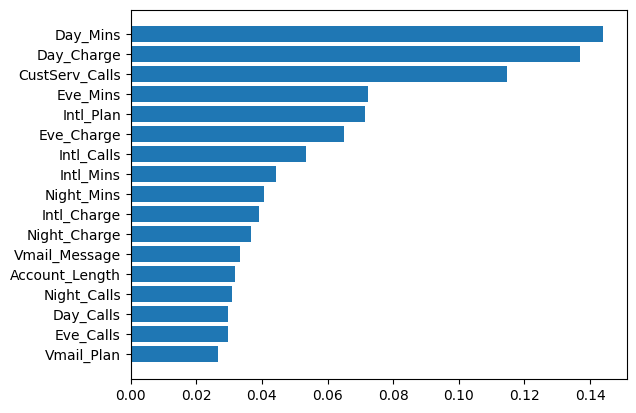

In [35]:
# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()